## 1. Bitcoin and Cryptocurrencies: How Volatile is the Cryto Market? 
Since the launch of Bitcoin in 2008, hundreds of similar projects based on the blockchain technology have emerged. We call these cryptocurrencies or 'cryptos' in slang. Some are extremely valuable nowadays, and others may have the potential to become extremely valuable in the future. By December of 2017, Bitcoin for example, had a market capitalization above $200 billion.  While the growth of bitcoin seems promising, one cannot overlook the high level of insecurity and volatility surrounding the crypto market in general. The cryptocurrency market is exceptionally volatile and any money you put in might disappear into thin air.  Cryptocurrencies mentioned in this analysis might be good assets or scams. 

I explore the following questions to provide insights about the state of the cryptocurrency financial market. 

1. How big is bitcoin compared to other cryptos?
2. How volatile are cryptocurrencies?
3. How volatile are cryptos within a 24 - hour span? 
4. How volatile are cryptos within a 1 week period?

Worth noting is that, this analysis does not seem to promote cryptocurrency or any particular kind of crytpocurrency neither does it seem to discredit the crypto market. Rather, this analysis aims at providing you with business insights about the performance of cryptocurriencies so you can make a personal data - driven decisions about the acquisition of cryptos. The final judgement is hence subjective.  


Data for this analysis was acquired on the coinmarketcap API (https://coinmarketcap.com/api/). 

In [ ]:
# Importing pandas
import pandas as pd

# Importing matplotlib and setting aesthetics for plotting later.
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# Reading dataset from local hard drive into pandas
crypto = pd.read_csv("C:/Users/Joseph/Documents/Data_Analytics/Python/My_Notebooks/Crypto_Market/datasets/coinmarketcap_06122017.csv")

#Reading the first 5 records to see dataset
print(crypto.head()) 

#Renaming 'id' column to a more intuitive name: 'currency'
crypto.rename(columns={"id": "currency"}, inplace=True)

# Selecting the 'id' and the 'market_cap_usd' columns as columns of interest.
market_cap_raw = crypto[['currency', 'market_cap_usd']]

# Counting the number of values
market_cap_raw.count()

   Unnamed: 0  24h_volume_usd  available_supply            id  last_updated  \
0           0    9.007640e+09      1.672352e+07       bitcoin    1512549554   
1           1    1.551330e+09      9.616537e+07      ethereum    1512549553   
2           2    1.111350e+09      1.684044e+07  bitcoin-cash    1512549578   
3           3    2.936090e+09      2.779530e+09          iota    1512549571   
4           4    2.315050e+08      3.873915e+10        ripple    1512549541   

   market_cap_usd    max_supply          name  percent_change_1h  \
0    2.130493e+11  2.100000e+07       Bitcoin               0.12   
1    4.352945e+10           NaN      Ethereum              -0.18   
2    2.529585e+10  2.100000e+07  Bitcoin Cash               1.65   
3    1.475225e+10  2.779530e+09          IOTA              -2.38   
4    9.365343e+09  1.000000e+11        Ripple               0.56   

   percent_change_24h  percent_change_7d  price_btc     price_usd  rank  \
0                7.33              17.45 

currency          1326
market_cap_usd    1031
dtype: int64

## 2. Discarding the cryptocurrencies without a market capitalization
The count() for market_cap_usd above is different because some cryptocurrencies listed in coinmarketcap.com have no known market capitalization, this is represented by NaN in the data, and NaN are not counted by count(). We should clean the data to remove the missing values in the 'currency' thus cryptos with no known market capitalization. 

In [14]:
# Filtering out rows without a market capitalization
cap = market_cap_raw.query('market_cap_usd > 0')

# Counting the number of values again
cap.count()

currency          1031
market_cap_usd    1031
dtype: int64

## 3. How big is Bitcoin compared with the rest of the cryptocurrencies?
Bitcoin is under serious competition from other projects, but it is still dominant in market capitalization. Let's plot the market capitalization for the top 10 coins as a barplot to better visualize this.

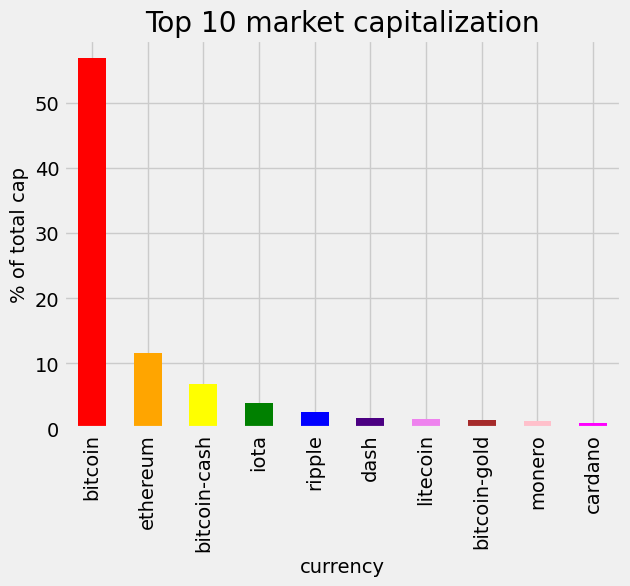

In [22]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

#setting a list of colors to use
rainbow= ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'brown', 'pink', 'magenta']

# Selecting the first 10 rows(top 10 currencies) and setting currency as index. saving in variable 'cap10'
cap10 = cap[:10].set_index('currency')

# Calculating market_cap_percentages using assign and lambda. 
cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd / cap.market_cap_usd.sum())*100)

# Plotting the barplot with the title and color defined above 
ax = cap10.market_cap_perc.plot.bar(title=TOP_CAP_TITLE, color = rainbow)

# Annotating the y axis with the label defined above
ax.set_ylabel(TOP_CAP_YLABEL);

## 4. What is going on?! Volatility in cryptocurrencies
The cryptocurrencies market has been spectacularly volatile since the first exchange opened. Let's explore this volatility a bit more! We will begin by selecting and plotting the 24 hours and 7 days percentage change, which we already have available.

In [23]:
# Selecting the currency, percent_change_24h and percent_change_7d columns
volatility = crypto[['currency', 'percent_change_24h', 'percent_change_7d']]

# Setting the index to 'currency' and dropping all NaN rows
volatility = volatility.set_index('currency').dropna()

# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values('percent_change_24h')

# Checking the first few rows
volatility.head()

,percent_change_24h,percent_change_7d
currency,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


## 5. Well, we can already see that things are *a bit* crazy
<p>It seems you can lose a lot of money quickly on cryptocurrencies. Let's plot the top 10 biggest gainers and top 10 losers in market capitalization.</p>

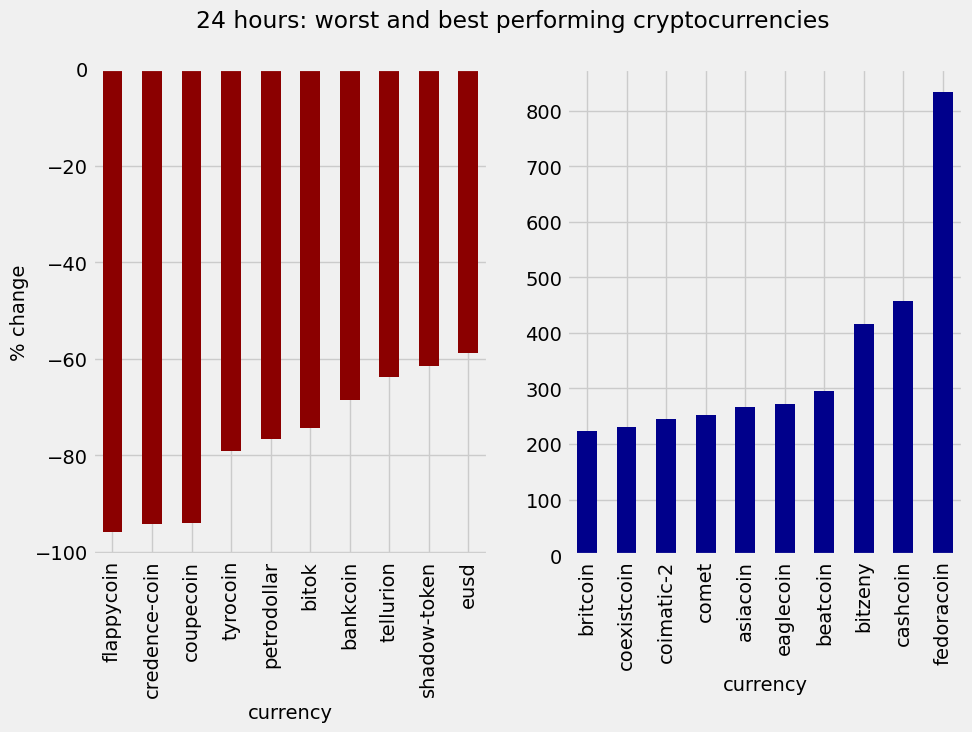

In [32]:
#Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    # Making the subplot and the figure for two side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    
    # Plotting with pandas the barchart for the top 10 losers
    ax = volatility_series[:10].plot.bar(color='darkred', ax=axes[0])
    
    # Setting the figure's main title to the text passed as parameter
    fig.suptitle(title)
    
    # Setting the ylabel to '% change'
    ax.set_ylabel('% change')
    
    # Same as above, but for the top 10 winners
    ax = volatility_series[-10:].plot.bar(color='darkblue', ax=axes[1])
    
    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "24 hours: worst and best performing cryptocurrencies"

# Calling the function above with the 24 hours period series and title DTITLE  
fig, ax = top10_subplot(volatility.percent_change_24h, DTITLE)

## 6. Ok, this result is interesting. Let's check the weekly Series too.
800% daily increase?! This seems huge. Why are we not investing in some of these coins? Well, you decide. 
After calming down, let's reuse the function defined above to see what is going weekly instead of daily.
Please take a moment to understand the implications of the red plots on how much value some cryptocurrencies lose in such short periods of time.

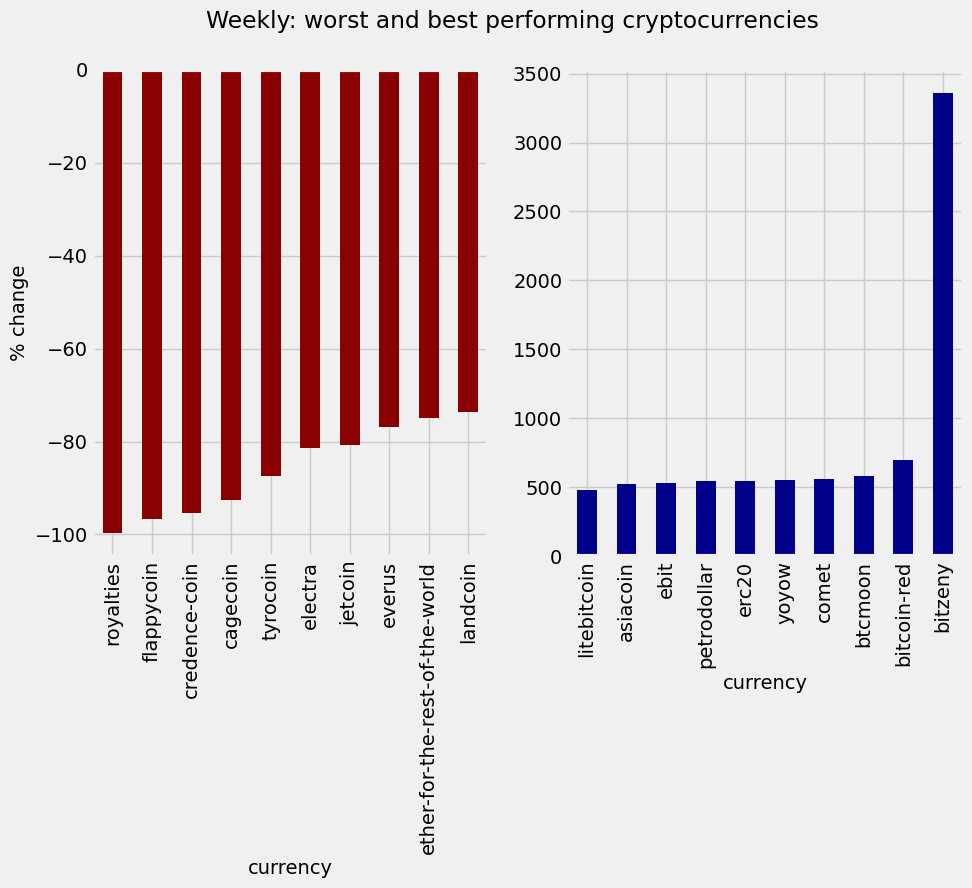

In [33]:
# Sorting in ascending order
volatility7d = volatility.sort_values('percent_change_7d')

WTITLE = "Weekly: worst and best performing cryptocurrencies"

# Calling the top10_subplot function
fig, ax = top10_subplot(volatility7d.percent_change_7d, WTITLE)

## 7. Conclusion
It seems that when seven days are accumulated, there are significant shifts in the level of performance of these currencies. The names of the cryptocurrencies above are quite unknown, and there is a considerable fluctuation between the 1 and 7 days percentage changes. As with stocks, and many other financial products, the smaller the capitalization, the bigger the risk and reward. Smaller cryptocurrencies are less stable projects in general, and therefore even riskier investments than the bigger ones. Though this analysis is based on old data, the findings are still relevant regarding the issue of volatility in the cryptocurrency market. 